# Simple Linear Regression 

In [166]:
%matplotlib inline

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import pandas as pd

pd.set_option('precision', 2) 
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:20,.2f}'.format) 
plt.style.use('seaborn')

In [3]:
# load data 
boston = pd.read_csv("../datasets/Boston.csv", index_col=0)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
2,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
3,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
4,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
5,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67,22.40
503,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
504,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
505,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00


## Using scikit-learn

In [12]:
from sklearn import linear_model

# ols model with intercept
ols_sl = linear_model.LinearRegression(fit_intercept=True)

# fitted ols model
x_train = boston['lstat'].values.reshape(-1,1)
y_true = boston['medv']
ols_sl.fit(x_train, y_true)

# summary
ols_sl.intercept_, ols_sl.coef_

(34.55384087938309, array([-0.95004935]))

In [14]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

y_pred = ols_sl.predict(boston['lstat'].values.reshape(-1,1))

ols_sl_summary = {"R^2": r2_score(y_true, y_pred),
                 "MSE": mean_squared_error(y_true, y_pred)}

for k,v in ols_sl_summary.items():
    print(k,":",v)

R^2 : 0.5441462975864797
MSE : 38.48296722989415


## Using statsmodels

In [16]:
import statsmodels.api as sm

# predictor and dependent variable
x_train = boston['lstat']
y_true = boston['medv']

# ols model with intercept
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))

# fitted model and summary
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

c:\users\choi\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           5.08e-88
Time:                        16:54:10   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# out of sample predictions
ols_sm_results.predict(sm.add_constant([5, 10, 15]))

array([29.80359411, 25.05334734, 20.30310057])

In [21]:
# prediction intervals 
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from collections import OrderedDict

y_pred = ols_sm_results.predict(sm.add_constant(x_train))
prstd, lower, upper = wls_prediction_std(ols_sm_results)

pred_dict = OrderedDict({"x_train": x_train,
                       "y_pred": y_pred,
                       "y_true": y_true,
                       'lwr': lower,
                       'upr': upper,
                       'pred_se': prstd})

pd.DataFrame(pred_dict)

,x_train,y_pred,y_true,lwr,upr,pred_se
1,4.98,29.82,24.00,17.58,42.06,6.23
2,9.14,25.87,21.60,13.64,38.10,6.22
3,4.03,30.73,34.70,18.48,42.97,6.23
4,2.94,31.76,33.40,19.51,44.01,6.23
5,5.33,29.49,36.20,17.25,41.73,6.23
...,...,...,...,...,...,...
502,9.67,25.37,22.40,13.14,37.59,6.22
503,9.08,25.93,20.60,13.70,38.15,6.22
504,5.64,29.20,23.90,16.96,41.43,6.23
505,6.48,28.40,22.00,16.16,40.63,6.23


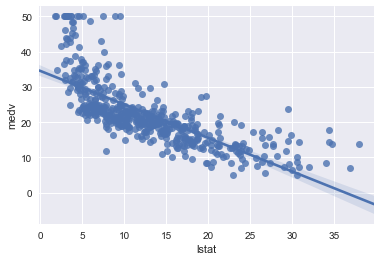

In [20]:
sns.regplot('lstat', 'medv', data=boston)

In [25]:
from statsmodels.graphics.regressionplots import *

ols_sm_resid = ols_sm_results.resid # residuals
ols_sm_resid_stud = ols_sm_resid / prstd # studentized residuals

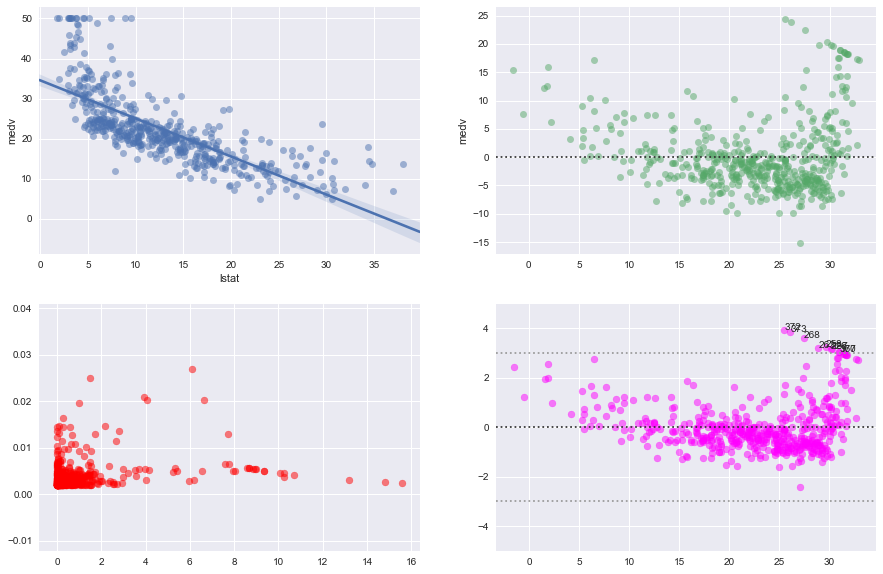

In [44]:
f, axes = plt.subplots(2, 2, sharex=False, sharey=False) 
f.set_figheight(10)
f.set_figwidth(15)

sns.regplot('lstat', 'medv', data=boston, ax=axes[0,0], scatter_kws={'alpha':'0.5'}) #regression plot
sns.residplot(y_pred, 'medv', data=boston, ax=axes[0, 1], scatter_kws={'alpha': '0.5'}) # residual plot

# custom leverage plot instead of above
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.stats import zscore
norm_resid = zscore(ols_sm_resid)
leverage = OLSInfluence(ols_sm_results).hat_matrix_diag
axes[1, 0].autoscale(enable=True, axis='y', tight=True)
axes[1, 0].scatter(norm_resid ** 2, leverage, alpha=0.5, color='red')

# studentized residual plot
axes[1, 1].scatter(y_pred, ols_sm_resid_stud, alpha=0.5, color='magenta')
axes[1, 1].axhline(0, ls=":", c=".2")
axes[1, 1].axhline(-3, ls=":", c=".6")
axes[1, 1].axhline(3, ls=":", c=".6")
axes[1, 1].set_ylim(-5, 5)

x = y_pred[np.logical_or(ols_sm_resid_stud > 3, ols_sm_resid_stud < -3)]
y = ols_sm_resid_stud[np.logical_or(ols_sm_resid_stud > 3, ols_sm_resid_stud < -3)]

for i, x, y in zip(x.index, x, y):
    axes[1, 1].annotate(i, xy=(x, y));

In [46]:
# item with the highest leverage (0-indexed)
leverage.argmax(), leverage.max()

(374, 0.026865166510283492)

# Multiple Linear Regression

In [129]:
# predictors and dependent variable
x_train = boston[['lstat', 'age']]
y_true = boston['medv']

# ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))

# fitted model and summary
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           2.98e-88
Time:                        01:08:47   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# R style formula
import statsmodels.formula.api as smf

ols_smf = smf.ols(formula='medv~lstat+age', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           2.98e-88
Time:                        01:08:48   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# all predictors
x_train = boston.drop("medv", axis=1)
y_true = boston['medv']

ols_sm = sm.OLS(y_true, sm.add_constant(x_train))
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        01:10:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumption Check

In [176]:
def lm_stats(X, y, y_pred):
    """ LEVERAGE & STUDENTISED RESIDUALS
    - https://en.wikipedia.org/wiki/Studentized_residual#How_to_studentize
    """
    # Responses as np array vector
    try: 
        y.shape[1] == 1
        # take first dimension as vector
        y = y.iloc[:,0]
    except:
        pass
    y = np.array(y)
    
    # Residuals
    residuals = np.array(y - y_pred)
    
    # Hat matrix
    H = np.array(X @ np.linalg.inv(X.T @ X)) @ X.T
    
    # Leverage
    h_ii = np.array(H).diagonal()
    
    ## Externally studentised residual
    # In this case external studentisation is most appropriate 
    # because we are looking for outliers.
    
    # Estimate variance (externalised)
    σi_est = []
    for i in range(X.shape[0]):
        # exclude ith observation from estimation of variance
        external_residuals = np.delete(residuals, i)
        σi_est += [np.sqrt((1 / (X.shape[0] - X.shape[1] - 1)) * np.sum(np.square(external_residuals)))]
    σi_est = np.array(σi_est)
    
    # Externally studentised residuals
    t = residuals / σi_est * np.sqrt(1 - h_ii)
    

    # Return dataframe
    return pd.DataFrame({'residual': residuals,
                         'leverage': h_ii, 
                         'studentised_residual': t,
                         'y_pred': y_pred})


def lm_plot(lm_stats_df): 
    """Provides R style residual plots based on results from lm_stat()"""
    # Parse stats
    t      = lm_stats_df['studentised_residual']
    h_ii   = lm_stats_df['leverage']
    y_pred = lm_stats_df['y_pred']
    
    # setup axis for grid
    plt.figure(1, figsize=(16, 18))
    
    # Studentised residual plot
    plt.subplot(321)
    ax = sns.regplot(x=y_pred, y=t, lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual plot', fontweight='bold')
    # Draw Hastie and Tibshirani's bounds for possible outliers
    ax.axhline(y=3, color='r', linestyle='dashed')
    ax.axhline(y=-3, color='r', linestyle='dashed');
    
    # Normal Q-Q plot
    plt.subplot(322)
    ax = stats.probplot(t, dist='norm', plot=plt)
    plt.ylabel('Studentised residuals')
    plt.title('Normal Q-Q', fontweight='bold')
    
    # Standardised residuals
    plt.subplot(323)
    ax = sns.regplot(x=y_pred, y=np.sqrt(np.abs(t)), lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('√Standardized residuals')
    plt.title('Scale-Location', fontweight='bold')
    
    # Residuals vs Leverage plot
    plt.subplot(324)
    ax = sns.scatterplot(x=h_ii, y=t)
    plt.xlabel('Leverage')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual vs Leverage', fontweight='bold');


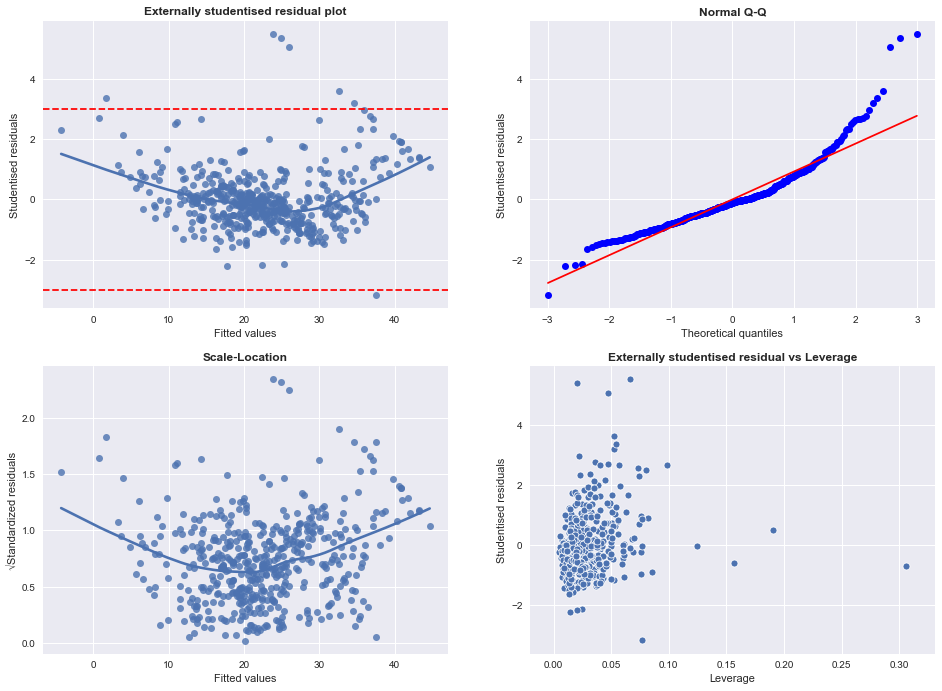

In [177]:
y_pred = ols_sm_results.predict(sm.add_constant(x_train))
lm_plot(lm_stats(sm.add_constant(x_train), y_true, y_pred))

# Multicollinearity

In [59]:
x_train.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54
ptratio,0.29,-0.39,0.38,-0.12,0.19,-0.36,0.26,-0.23,0.46,0.46,1.00,-0.18,0.37
black,-0.39,0.18,-0.36,0.05,-0.38,0.13,-0.27,0.29,-0.44,-0.44,-0.18,1.00,-0.37


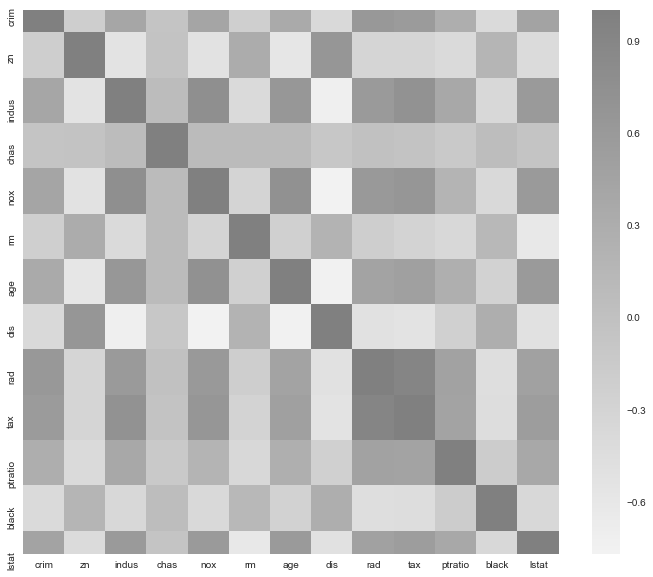

In [80]:
plt.figure(figsize=(12,10))
cmap = sns.light_palette("gray", as_cmap=True)
sns.heatmap(x_train.corr(), annot=False, cmap=cmap)
plt.show()

In [94]:
# variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# don't forget to add constant if the ols model includes intercept
x_train_add = sm.add_constant(boston.drop('medv', axis=1))


for i, col in enumerate(x_train_add.columns):
    if col == 'const':
        pass
    elif len(col) > 6:
        print(col, ':', "{0:.2f}".format(vif(x_train_add.as_matrix(), i)))
    else:
        print(col, '\t:', "{0:.2f}".format(vif(x_train_add.as_matrix(), i)))

crim 	: 1.79
zn 	: 2.30
indus 	: 3.99
chas 	: 1.07
nox 	: 4.39
rm 	: 1.93
age 	: 3.10
dis 	: 3.96
rad 	: 7.48
tax 	: 9.01
ptratio : 1.80
black 	: 1.35
lstat 	: 2.94


c:\users\choi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\choi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


# Interaction Term

In [95]:
import statsmodels.formula.api as smf

ols_smf = smf.ols(formula='medv~lstat*age', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           4.86e-88
Time:                        00:43:03   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Non-linear Transformations of Predictors

In [107]:
ols_smf = smf.ols('medv~lstat+np.power(lstat,2)', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          1.56e-112
Time:                        00:48:21   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

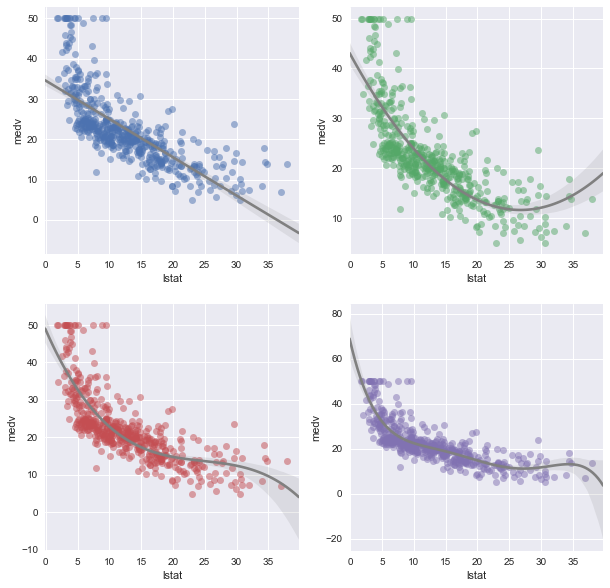

In [113]:
f, axes = plt.subplots(2,2,sharex=False,sharey=False)
f.set_figheight(10)
f.set_figwidth(10)
sns.regplot('lstat', 'medv', data=boston, ax=axes[0,0], order=1, line_kws={'color':'gray'}, scatter_kws={'alpha':'0.5'})
sns.regplot('lstat', 'medv', data=boston, ax=axes[0,1], order=2, line_kws={'color':'gray'}, scatter_kws={'alpha':'0.5'})
sns.regplot('lstat', 'medv', data=boston, ax=axes[1,0], order=3, line_kws={'color':'gray'}, scatter_kws={'alpha':'0.5'})
sns.regplot('lstat', 'medv', data=boston, ax=axes[1,1], order=5, line_kws={'color':'gray'}, scatter_kws={'alpha':'0.5'})

In [114]:
# polynomial ols model with intercept
ols_smf = smf.ols(formula='medv ~ np.log(rm)', data=boston)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           1.22e-64
Time:                        00:57:33   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

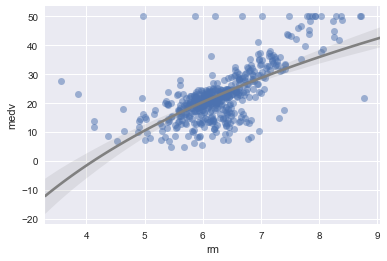

In [115]:
sns.regplot('rm', 
            'medv', 
            data=boston, 
            logx=True, 
            line_kws={'color': 'gray'}, 
            scatter_kws={'alpha': '0.5'})